# <center>Accessing SQL Server from Python with ODBC </center>
links:
    
https://blogs.msdn.microsoft.com/cdndevs/2015/03/11/python-and-data-sql-server-as-a-data-source-for-python-applications/
    
https://tomaztsql.wordpress.com/2018/07/15/using-python-pandas-dataframe-to-read-and-insert-data-to-microsoft-sql-server/

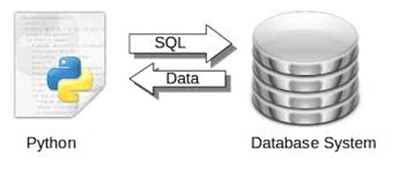

In [1]:
!pip install pyodbc

  Using cached pyodbc-5.2.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.7 kB)
Using cached pyodbc-5.2.0-cp313-cp313-macosx_11_0_arm64.whl (72 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pyodbc
import pandas as pd

pg_conn = pyodbc.connect("DRIVER={PostgreSQL ODBC Driver(UNICODE)};"
                          "SERVER=localhost;"
                          "DATABASE=chinook;"
                          "Trusted_Connection=yes;"
                          "uid=romadv-mac;pwd=") 

query = '''SELECT * FROM customer limit 3;'''
                 
df = pd.read_sql(query, pg_conn)

print(df.head(3))

print(type(df))

   customer_id first_name  last_name  \
0            1       Luís  Gonçalves   
1            2     Leonie     Köhler   
2            3   François   Tremblay   

                                            company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   

                           address                 city state  country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP   Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None  Germany   
2                1498 rue Bélanger             Montréal    QC   Canada   

  postal_code               phone                 fax                  email  \
0   12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   luisg@embraer.com.br   
1       70174    +49 0711 2842222                None  leonekohler@surfeu.de   
2     H2G 1A7   +1 (514) 721-4711                None    ftremblay@gmail.com   



/var/folders/tg/pz9klzrx2s1dps15b_lgvhqr0000gn/T/ipykernel_48113/2475256837.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, pg_conn)


In [ ]:
# Windows integrated security.
# SQL Native driver...

import pyodbc

cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server={DESKTOP-TG2VLSU\SQL2017};"
                      "Database=AdventureWorks2017;"
                      "Trusted_Connection=yes;")

cursor = cnxn.cursor()

cursor.execute('SELECT top 2 * FROM Person.Person')

for row in cursor:
    print('row = %r' % (row,))

In [ ]:
## From SQL to DataFrame Pandas
#  Use tripple quotes ''' to write a multipline query.
import pandas as pd
import pyodbc

sql_conn = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=DESKTOP-TG2VLSU\SQL2017;"
                          "DATABASE=AdventureWorks2017;"
                          "Trusted_Connection=yes;") 

query = '''SELECT top 5 * 
           FROM Person.Person'''
                 
df = pd.read_sql(query, sql_conn)

print(df.head(3))

print(type(df))


In [ ]:
# using credentials...

sql_conn2 = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=localhost\MSSQLServer01;"
                          "DATABASE=AdventureWorks2017;"
                          "Trusted_Connection=yes;"
                          "uid=bryant;pwd=bryantuser123") 


query = '''SELECT top 5 * FROM Person.Person'''
                 
df = pd.read_sql(query, sql_conn)

print(df.head(3))

print(type(df))

In [ ]:
## From SQL to DataFrame Pandas
import pandas as pd
import pyodbc

# Windows integrated security...

sql_conn = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=DESKTOP-TG2VLSU\SQL2017;"
                          "DATABASE=AdventureWorksDW2017;"
                          "Trusted_Connection=yes;") 


query = '''SELECT DateKey, CalendarYear FROM dbo.DiMDate'''
                 
df = pd.read_sql(query, sql_conn)

print(df.head(3))

print('Object type is: ', type(df))

## Using SQL Server credentials based security

In [ ]:
# using credentials...
sql_conn2 = pyodbc.connect("DRIVER={ODBC Driver 13 for SQL Server};"
                          "SERVER=DESKTOP-TG2VLSU\SQL2017;"
                          "DATABASE=AdventureWorksDW2017;"
                          "Trusted_Connection=yes;"
                          "uid=Bryan;pwd=bryan") 

# Note we can use T-sQL syntax...
query = '''SELECT top 2 DateKey, DayNumberOfWeek, EnglishMonthName as MonthName FROM dbo.DiMDate'''
                 
df = pd.read_sql(query, sql_conn)

print(df)

# A Better Way...

## We'll create a reusable function that will return query results to us.
## This will use Windows Authenticiation.

In [6]:
sqlservername = 'DESKTOP-TG2VLSU\SQL2017'

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
/var/folders/tg/pz9klzrx2s1dps15b_lgvhqr0000gn/T/ipykernel_48113/3181826460.py:1: SyntaxWarning: invalid escape sequence '\S'
  sqlservername = 'DESKTOP-TG2VLSU\SQL2017'


In [ ]:
import pyodbc
import pandas as pd

def get_db_data_is(sqlstatement, 
                driver = "{ODBC Driver 13 for SQL Server}",
                server = sqlservername,
                database = "AdventureWorksDW2017"):
    
    '''
        get_db_data takes a SQL query as input and returns a result
    
        arguments:
        
            sqlstatement = query you want to execute
            driver = database driver to use
            server = database server name
            database = database name 
    '''

    conn = pyodbc.connect("Driver=" + driver + ";"
                          "Server=" + server + ";"
                          "Database=" + database + ";"
                          "Trusted_Connection=yes;")

    cur = conn.cursor()
    
    # result = cur.execute(sqlstatement).fetchall()
    
    result = pd.read_sql(sqlstatement, conn)
    
    # cur.close()
    conn.close()
    
    return result

In [ ]:
dfdate = get_db_data_is('select top 3 * from dbo.DimDate')
dfdate.head(3)

## Sometimes we need database authentication and we may want to query
## a non SQL Server database so let's have a function version that does that.

In [7]:
import pyodbc
import pandas as pd

def get_db_data_da(sqlstatement, 
                driver = "{ODBC Driver 13 for SQL Server}",
                server = sqlservername,
                userid = 'Bryan',
                pw = 'bryan', # Don't do this!!!
                database = "AdventureWorksDW2017"):
    
    '''
        get_db_data takes a SQL query as input and returns a result
    
        arguments:
        
            sqlstatement = query you want to execute
            driver = database driver to use
            server = database server name
            database = database name 
    '''

    conn = pyodbc.connect("Driver=" + driver + ";"
                          "Server=" + server + ";"
                          "Database=" + database + ";"
                          "Trusted_Connection=yes;"
                          "uid=" + userid + ";" 
                          "pwd=" + pw + ";")

    cur = conn.cursor()
    
    # result = cur.execute(sqlstatement).fetchall()
    
    result = pd.read_sql(sqlstatement, conn)
    
    # cur.close()
    conn.close()
    
    return result

# Let's try it out...

In [17]:
# sql = '''
# SELECT EnglishProductCategoryName as Category,
#        sc.EnglishProductSubcategoryName as SubCat,
#        p.EnglishProductName as Product,
#        SUM(SalesAmount) as SalesAmount
# FROM dbo.FactInternetSales          s
# JOIN  dbo.DimProduct                p
#   on (s.ProductKey = p.ProductKey) 
# JOIN dbo.DimProductSubcategory      sc
#   ON (p.ProductSubcategoryKey = sc.ProductSubcategoryKey)
# JOIN dbo.DimProductCategory         pc
#   ON (sc.ProductCategoryKey = pc.ProductCategoryKey)
# GROUP BY EnglishProductCategoryName, 
#          EnglishProductSubcategoryName,
#          EnglishProductName

# '''
sql = '''
select * from customer;
'''

## Integrated security first...

In [ ]:
dfsalessum = get_db_data_is(sql)
dfsalessum.head()

## Now, let's do database authentication...

In [ ]:
dfsalessum = get_db_data_da(sql)
dfsalessum.head()

## Let's use the function to query a PostgreSQL database...

In [18]:
dfdate = get_db_data_da(driver = "{PostgreSQL ODBC Driver(UNICODE)}", 
                        server='localhost',
                     database = 'chinook',
                    userid = 'romadv-mac',
                      pw = '',
                     sqlstatement = sql)

/var/folders/tg/pz9klzrx2s1dps15b_lgvhqr0000gn/T/ipykernel_48113/1344053658.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(sqlstatement, conn)


In [19]:
dfdate.head(3)

customer_id first_name  last_name  \
0            1       Luís  Gonçalves   
1            2     Leonie     Köhler   
2            3   François   Tremblay   

                                            company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   

                           address                 city state  country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP   Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None  Germany   
2                1498 rue Bélanger             Montréal    QC   Canada   

  postal_code               phone                 fax                  email  \
0   12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   luisg@embraer.com.br   
1       70174    +49 0711 2842222                None  leonekohler@surfeu.de   
2     H2G 1A7   +1 (514) 721-4711                None    ftremblay@gmail.com   

   support_rep_id  
0               3  
1               5  
2               3

# Extracting data from SQL Server to SQLite

In [ ]:
salesterritoryDF = get_db_data_is('select top 5 * from dbo.DimSalesTerritory')
salesterritoryDF.head(3)

In [14]:
import sqlite3
import pandas as pd

In [15]:
conn = sqlite3.connect("adventurelite.db")
cur = conn.cursor()

In [20]:
dfdate.to_sql('chinook_customer', con=conn, if_exists='append')

59

In [21]:
pd.read_sql_query('select * from chinook_customer limit 3', conn)

index  customer_id first_name  last_name  \
0      0            1       Luís  Gonçalves   
1      1            2     Leonie     Köhler   
2      2            3   François   Tremblay   

                                            company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   

                           address                 city state  country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP   Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None  Germany   
2                1498 rue Bélanger             Montréal    QC   Canada   

  postal_code               phone                 fax                  email  \
0   12227-000  +55 (12) 3923-5555  +55 (12) 3923-5566   luisg@embraer.com.br   
1       70174    +49 0711 2842222                None  leonekohler@surfeu.de   
2     H2G 1A7   +1 (514) 721-4711                None    ftremblay@gmail.com   

   support_rep_id  
0               3  
1               5  
2               3

In [ ]:
cur.close()

In [24]:
conn.close()